In [4]:
import os
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
import imagesize
import numpy as np

In [15]:
IMAGE_DIR = '/home/danil/Documents/курсовая/image_classification/categories/all/'
imgs = []
for root, _, filenames in os.walk(IMAGE_DIR):
    for file in filenames:
        imgs.append((os.path.join(root, file)))

In [17]:
len(imgs)

17852

In [18]:
img_meta = {}
for file in imgs:
    img_meta[file] = imagesize.get(file)

In [21]:
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns')
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total number of images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total number of images in the dataset: 17852


,FileName,Size,Width,Height,Aspect Ratio
0,/home/danil/Documents/курсовая/image_classific...,"(1200, 1200)",1200,1200,1.00
1,/home/danil/Documents/курсовая/image_classific...,"(351, 840)",351,840,0.42
2,/home/danil/Documents/курсовая/image_classific...,"(278, 1200)",278,1200,0.23
3,/home/danil/Documents/курсовая/image_classific...,"(1200, 1200)",1200,1200,1.00
4,/home/danil/Documents/курсовая/image_classific...,"(1200, 1200)",1200,1200,1.00


Text(0, 0.5, 'Height')

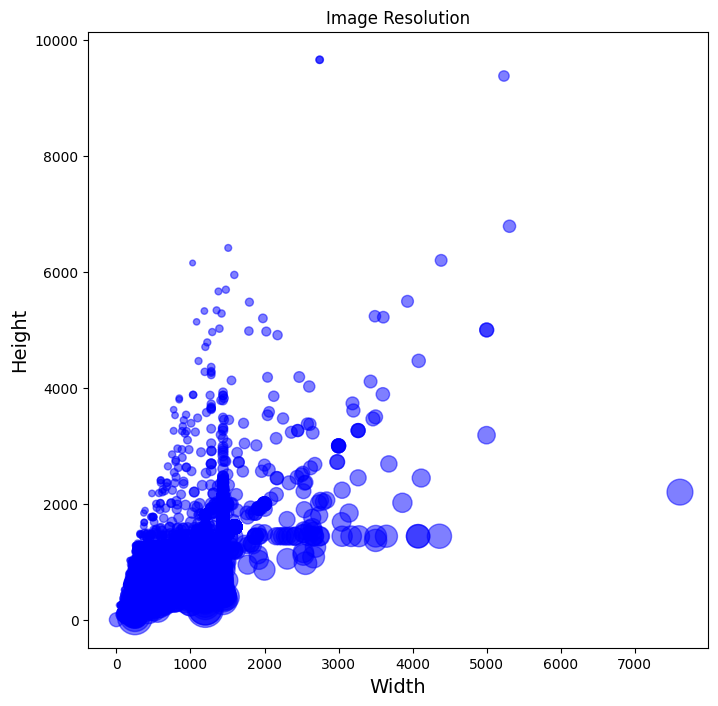

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [37]:
img_meta_df.shape

(17852, 5)

Оставим только достатосно крупные изображения:

In [46]:
img_filtered_sizes = img_meta_df[(img_meta_df['Width'] >= 256) & (img_meta_df['Height'] >= 256)]
img_filtered_sizes.shape

(14632, 5)

Все изображения приводим к стандартному размеру 256х256.

In [139]:
for idx, row in img_filtered_sizes.iterrows():
    file_name = row['FileName']
    *_, dir, name = file_name.split('/')
    new_dir = os.path.join('/home/danil/Documents/курсовая/image_classification/categories/resized/', dir)
    if not os.path.exists(new_dir):
        os.mkdir(new_dir)
    new_path = os.path.join(new_dir, name)
    if os.path.exists(new_path):
        continue
    try:
        image = Image.open(file_name)
        image = image.resize((256, 256)) 
    except ValueError:
        continue
    try:
        image.save(new_path)
    except OSError:
        image = image.convert('RGB')
        image.save(new_path)

In [145]:
for root, dir, f in os.walk('/home/danil/Documents/курсовая/image_classification/categories/resized/'):
    for d in dir:
        print(d, len(os.listdir(os.path.join(root, d))))

beer 396
rice 454
canned_food 443
energy_drinks 385
coffee 351
chocolate 303
chips 240
eggs 416
champagne 291
hair_care 498
bread 336
red_wine 302
pasta 272
juices 430
frozen_veg 234
baby_food 217
vegetables 401
fruit 467
yoghurt 395
dogs 217
skin_care 663
milk 436
baking 440
spirits 247
cats 223
white_wine 310
poultry 396
sodas 496
cheese 342
dental_care 112
seafood 271
herbs 436
cosmetics 496
biscuits 416
oil 300
ice_cream 451
tea 379
meat 342
butter 323
water 407
